# Computation

Linear algebra in practice is done using software, as the number of computations required for even basic operations is prohibitive for working by hand. We are going to focus on two aspects of computation in linear algebra: *time complexity* and *numerical stability*. 

## Time Complexity

Every mathematical operation we perform entails computational costs. In order to perform the computation, we must invest time and computational resources. For small examples like those illustrated in previous chapters, the computational costs are negligible, but most real-world use of linear algebra is not like that. At the time of this writing, widely used machine learning or AI tools rely on matrix-matrix or matrix-vector multiplies done with matrices containing millions to billions of components. The computational costs of such operations can be amortized only to a degree through parallelization, and the computational cost is always a consideration when actually using linear algebra; indeed, there are many important ideas and algorithms from linear algebra that aren't used because the computational costs are just too high. 

```{admonition} Definition: Big-O notation
We say '$f(x)$ is on the order of $g(x)$' and write $f(x) = \mathcal{O}(g(x))$ as $x\to\infty$ if there exist constants $M, x_0$ such that $|f(x)| \leq M|g(x)|$ for all $x \geq x_0$.
```

Big-O notation is typically used when one is interested in describing the growth rate of a function; that is, what happens in a general sense as the input grows large. It is not appropriate when we are looking for exactness, and it is important to recognize that big-O notation is a way of simply giving an upper bound on the growth rate of a function, and that upper bound is not necessarily the *least* upper bound. 

**Example:** Suppose that $f(x) = 3x^3 - 270x^2 + 121234x + 9999$. Then $f(x) = \mathcal{O}(x^3)$, because for very large values of $x$, $f(x)$ is not very different than $3x^3$, and in particular, $|f(x)| \leq 3|x^3|$ for large enough $x$. On the other hand, it never equals $3x^3$. Formally, for $x \geq 1$,

$$
    \begin{align*}
        |3x^3 - 270x^2 + 121234x + 9999| &\leq 3x^3 + |-270x^2| + |121234x| + 9999 \\
        |3x^3 - 270x^2 + 121234x + 9999| &\leq 3x^3 + 270x^3 + 121234x^3 + 9999x^3 \\
        |3x^3 - 270x^2 + 121234x + 9999| &\leq 131,506x^3,
    \end{align*}
$$

which proves the claim, though note that in fact $M$ can be made smaller than $131,506$; see the computational example below:

In [32]:
import numpy as np
import pandas as pd

def cubic(x: float) -> float:
    return 3 * x**3 - 270 * x**2 + 121234 * x + 9999

arr = np.empty(shape=(11, 3))
for i, x in enumerate(np.linspace(1, 100000000, 11)):
    arr[i,:] = [x, cubic(x), 3*x**3]

df = pd.DataFrame(arr)
df.columns=['x', 'cubic(x)', '$3x^3$']
df

,x,cubic(x),$3x^3$
0,1.0,1.309660e+05,3.000000e+00
1,10000000.9,2.999974e+21,3.000001e+21
2,20000000.8,2.399989e+22,2.400000e+22
3,30000000.7,8.099976e+22,8.100001e+22
4,40000000.6,1.919996e+23,1.920000e+23
5,50000000.5,3.749993e+23,3.750000e+23
6,60000000.4,6.479990e+23,6.480000e+23
7,70000000.3,1.028999e+24,1.029000e+24
8,80000000.2,1.535998e+24,1.536000e+24
9,90000000.1,2.186998e+24,2.187000e+24


We will be using big-O notation to loosely describe the worst-case scenario for the runtime of an algorithm with an input size of $n$. That is, we define a function $f(n)$ where the input size is the independent variable $n$ and the output of $f$ is the runtime of the algorithm. There is an implicit assumption that $n$ is a positive integer and the output of $f$ is a nonnegative real number.

```{admonition} Definition: Time Complexity
 The *time complexity* of an algorithm is the number of elementary operations needed to perform the algorithm.
 ```

It is assumed implicitly in the above definition that each elementary operation takes an equal fixed amount of time. This is sometimes called the *unit cost* model of computation. In practice, this is not true: on modern processors it is estimated that multiplication takes 3-6 times longer than addition. For this reason, we will often count multiplication operations and addition operations separately when analyzing algorithms that involve both, and may even choose to focus only on multiplications at the expense of additions from time to time (see the bonus section on faster matrix multiplication, for example).

## Comparing Orders

Suppose that we want to add together positive integers from $1$ to $n$. This is a simple operation that can be done in a few different ways and will illustrate the type of difference we are trying to capture with big-O. One way to add these numbers up is the obvious way: $\sum_{i=1}^n i = 1 + 2 + \cdots + (n-1) + n$. The other is to use the famous formula $\sum_{i=1}^n i = n(n+1)/2$. The first is $\mathcal{O}(n)$ (linear), while the second is $\mathcal{O}(1)$ (constant). In fact, we can time these two approaches to see the difference here:

In [47]:
def naive_sum(n: int) -> int:
    out = 0
    for i in range(n):
        out += i
    return i

def fast_sum(n: int) -> int:
    return (n * (n + 1)) / 2

In [48]:
%%timeit

naive_sum(1000000)

44 ms ± 1.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [49]:
%%timeit

fast_sum(1000000)


80.8 ns ± 1.39 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


The second approach is much faster than the first, but the really important thing to note here is that the second approach takes approximately as long (there is some variability that is expected and can't be controlled) regardless of how many integers we happen to be adding up, while the first increases in time proportional to the number of integers being added up:

In [50]:
%%timeit 

naive_sum(1000000000)

43.9 s ± 392 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [51]:
%%timeit

fast_sum(1000000000)


118 ns ± 3.32 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


```{admonition} $\mathcal{O}(1)$ Means Constant Time
:class: important

$\mathcal{O}(1)$ means the algorithm requires constant time regardless of the input. It does not mean 1 unit of time. There is always some variability, but the time taken by a $\mathcal{O}(1)$ algorithm is not affected by the size of the input.

The plots at the end of this section illustate visually the differences between these and other time complexities that we will encounter.

## Time Complexity of Vector and Matrix Operations

**Example:** The time complexity of adding two vectors of length $n$ is $n$, because adding the vectors requires $n$ elementary operations, one addition for each component of the new vector. In big-O notation, the time complexity is $\mathcal{O}(n)$.

**Example:** The time complexity of the dot product of two vectors of lenth $n$ is $2n-1$. There are $n$ multiplications to perform, followed by summing the values produced by the multiplication, of which there are $n$. Only $n-1$ additions are required to sum $n$ elements (check this with an example if it isn't obvious to you), therefore the time complexity of the dot product is $n + (n-1) = 2n-1$ or $\mathcal{O}(n)$.

**Example:** The time complexity of multiplication of a vector of length $n$ by an $n\times n$ matrix is $\mathcal{O}(n^2)$. To see this, note that multiplying a matrix and a vector requires $n$ dot products, one for each row. We just determined that each dot product entails $2n-1$ elementary operations, so matrix-vector multiplication must require $n(2n-1) = 2n^2 - n$ or in big-O notation is $\mathcal{O}(n^2)$. 

**Example:** Building on the last two examples, we can infer that matrix multiplication is $\mathcal{O}(n^3)$ (assuming the matrices are both $n\times n$). We have $2n^3 - n^2$ operations required for each column of the matrix on the right in the multiplication, and there are $n$ of those columns, which leads to $n(2n^2 - n) = 2n^3 - n^2$ operations. **Note:** This cost only applies to matrix multiplication as done using the 'row method' that we usually use when working by hand. In fact there are faster, though far less intuitive methods, and you can refer to the optional section on faster matrix multiplication for details on this. Finding still faster ways to multiply matrices is an active area of research in mathematics and computer science.

## Time Complexity of Gaussian Elimination

Gaussian elimination is expensive also: the forward pass (reducing $A$ to an upper-triangular matrix) is $\mathcal{O}(n^3)$. It follows that $A= LU$ is also $\mathcal{O}(n^3)$. To see this, consider the elimination steps that occur at the $k^{th}$ pivot:
- For each row $j$ of the $n-k$ rows below, calculate the multiplier $m_{jk} = a_{jk}/a_{kk}$ that row $k$ will be multiplied by to zero out $a_{jk}$. (1 division)
- Multiply all of the $n-k+1$ nonzero entries in row $k$ by $m_{jk}$ ($n-k + 1$ multiplications)
- Subtract the nonzero entries produced above from the nonzero entries in row $j$ ($n-k + 1$ subtractions)

For a single row $j$, then, we have $2(n-k + 1) + 1$ operations needed in order to eliminate an entry. We have $n-k$ rows below the $k^{th}$ pivot, so for this pivot we have a total of $(n-k)(2(n-k+1) + 1)$ operations to perform. 

Finally, we need to do all of these operations for each row, $1 \leq k \leq n$. That gives

$$
    \sum_{k=1}^n (n-k)(2n-2k+3)
$$

elementary operations to perform in total. 

There are a few handy formulas that help when evaluating this sum, one of which we used above:

$$
    \sum_{k=1}^n 1 = n,
$$

$$
    \sum_{k=1}^n k = (n(n+1)) / 2,
$$

and

$$
    \sum_{k=1}^n k^2 = (n(n+1)(2n+1) / 6.
$$

So

$$
    \begin{align*}
        \sum_{k=1}^n (n-k)(2n-2k+3) &= \sum_{k=1}^n 2n^2 - 4nk + 2k^2 + 3n - 3k \\
                                    &= \sum_{k=1}^n (2n^2 + 3n) - (4n + 3)k + 2k^2 \\
                                    &= (2n^2 + 3n) \sum_{k=1}^n 1 - (4n + 3)\sum_{k=1}^n k + 2\sum_{k=1}^n k^2 \\
                                    &= (2n^2 + 3n)\cdot n - (4n + 3)\cdot \left(\frac{n(n+1))}{2}\right) + 2\left(\frac{n(n+1)(2n+1)}{6}\right).
                                    \end{align*}
$$

We can multiply this all out to find the exact number of elementary operations, but at this point it's possible to see without any more arithmetic that the highest order terms that occur are $n^3$; thus the forward pass of Gaussian elimination is $\mathcal{O}(n^3)$.

## Time Complexity of Back Substitution

The backward pass of Gaussian elimination is equivalent to back substitution, which is also equivalent to solving a matrix equation when the equation is triangular (upper or lower is not important here). This is $\mathcal{O}(2)$.

We will illustrate this for $L\mathbf{y}=\mathbf{b}$, where $L$ is a lower triangular matrix. The argument is the same *mutatis mutandis* for an upper triangular $U$. To solve for $y_k$, there is one division, $k-1$ multiplications, and $k-1$ subtractions required, for $2k-1$ operations altogether (verify this!). Over all $k$ entries, then, there are 

$$
    \sum_{k=1}^n 2k-1 = n(n-1) - n = n^2
$$

elementary operations required in total.

This is why $A=LU$ is used when we need to solve $A\mathbf{x} = \mathbf{b}$ for one $A$ but many $\mathbf{b}$. Recall the algorithm for solving $A\mathbf{x} = \mathbf{b}$ given $A=LU$:

- Set $U\mathbf{x} = \mathbf{y}$ (placeholder operation, no computational cost)
- Solve $L\mathbf{y} = \mathbf{b}$ ($\mathcal{O}(n^2)$)
- Solve $U\mathbf{x} = \mathbf{y}$ ($\mathcal{O}(n^2)$)

Two $\mathcal{O}(n^2)$ steps are preferable to one $\mathcal{O}(n^3)$ step, so we find $A=LU$ once, then iterate these three steps for each $\mathbf{b}$ that we need to solve $A\mathbf{x} = \mathbf{b}$ for. The plot below illustrates how different $\mathcal{O}(n^2)$ and $\mathcal{O}(n^3)$ can be.

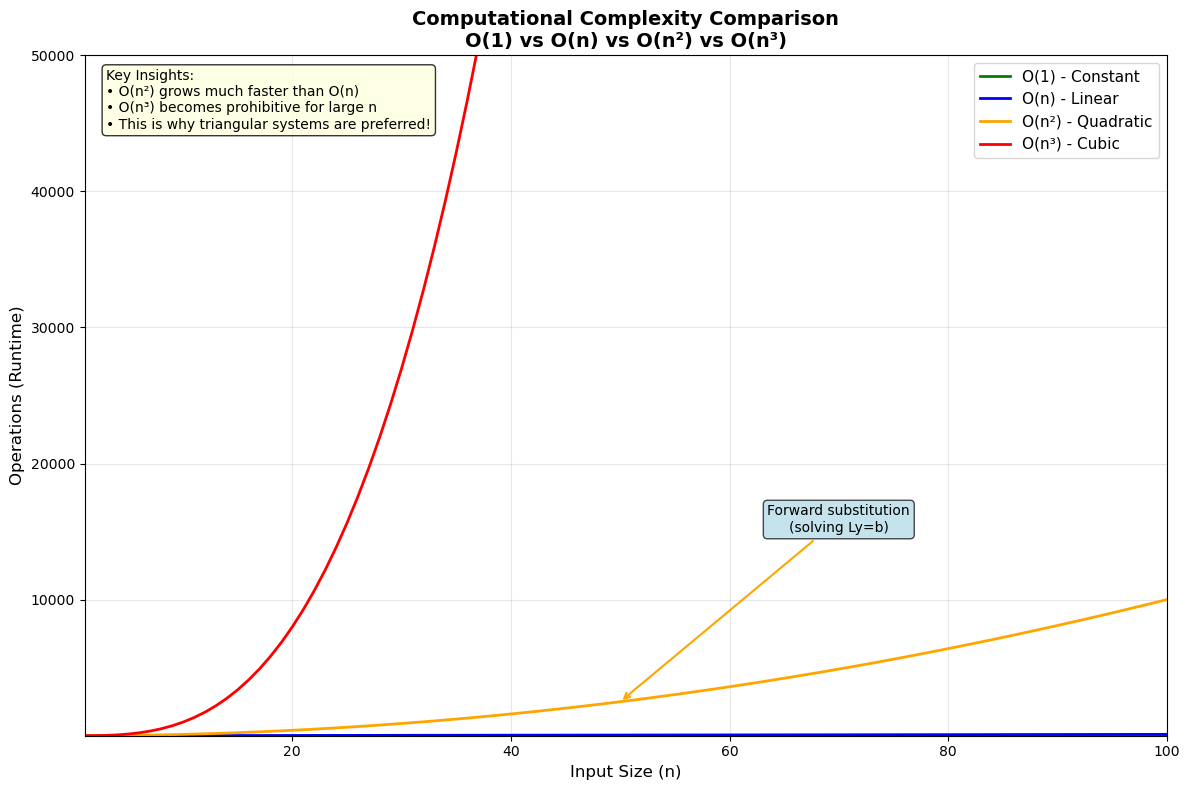

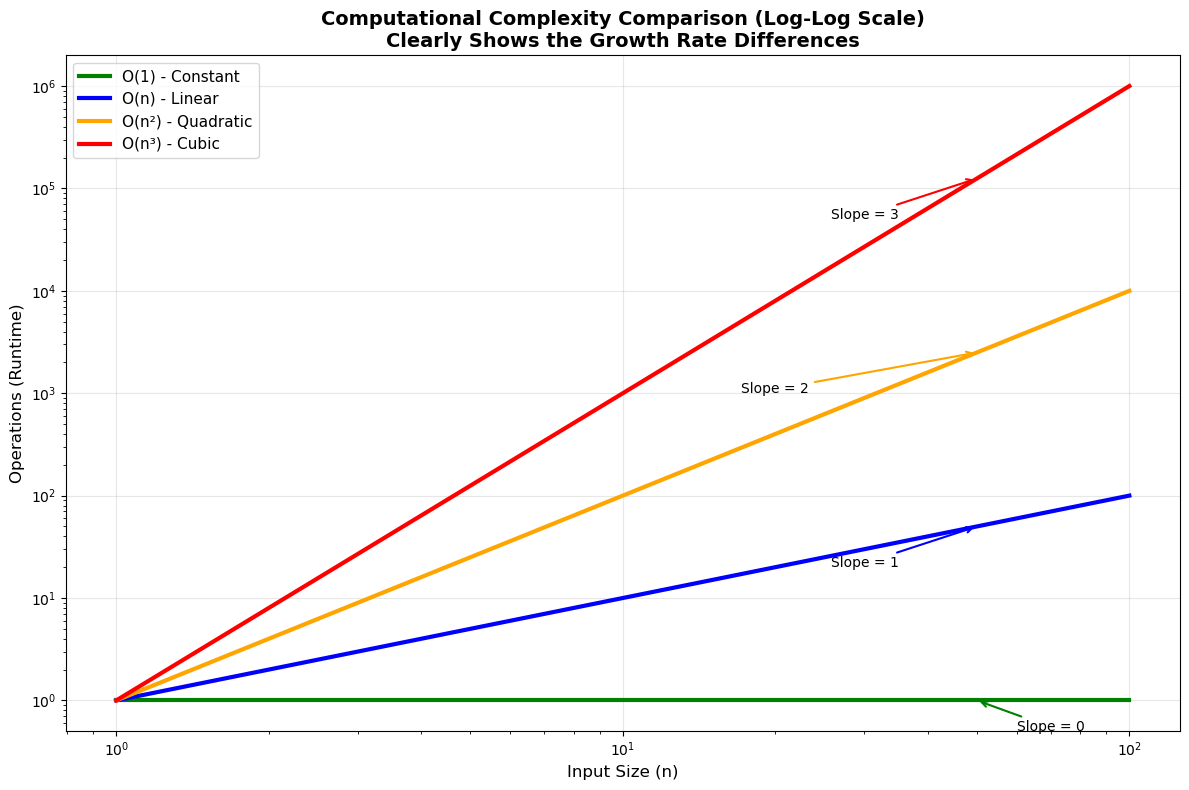

Runtime Comparison for Different Input Sizes:
     n       O(1)       O(n)        O(n²)           O(n³)
-------------------------------------------------------
    10          1         10          100           1,000
    50          1         50        2,500         125,000
   100          1        100       10,000       1,000,000
   500          1        500      250,000     125,000,000
  1000          1       1000    1,000,000   1,000,000,000


In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Create array of n values
n = np.arange(1, 101)

# Define the complexity functions
O_1 = np.ones_like(n)  # O(1) - constant
O_n = n               # O(n) - linear
O_n2 = n**2          # O(n^2) - quadratic
O_n3 = n**3          # O(n^3) - cubic

# Create the plot
plt.figure(figsize=(12, 8))

# Plot each complexity class
plt.plot(n, O_1, label='O(1) - Constant', linewidth=2, color='green')
plt.plot(n, O_n, label='O(n) - Linear', linewidth=2, color='blue')
plt.plot(n, O_n2, label='O(n²) - Quadratic', linewidth=2, color='orange')
plt.plot(n, O_n3, label='O(n³) - Cubic', linewidth=2, color='red')

# Customize the plot
plt.xlabel('Input Size (n)', fontsize=12)
plt.ylabel('Operations (Runtime)', fontsize=12)
plt.title('Computational Complexity Comparison\nO(1) vs O(n) vs O(n²) vs O(n³)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11, loc='upper right')
plt.grid(True, alpha=0.3)

# Set axis limits for better visualization
plt.xlim(1, 100)
plt.ylim(1, 50000)

# Add annotations to highlight key differences
plt.annotate('Forward substitution\n(solving Ly=b)', 
             xy=(50, 2500), xytext=(70, 15000),
             arrowprops=dict(arrowstyle='->', color='orange', lw=1.5),
             fontsize=10, ha='center',
             bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue', alpha=0.7))

plt.annotate('Gaussian elimination\n(general system)', 
             xy=(40, 64000), xytext=(25, 35000),
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
             fontsize=10, ha='center',
             bbox=dict(boxstyle="round,pad=0.3", facecolor='lightcoral', alpha=0.7))

# Add text box with key insights
textstr = '''Key Insights:
• O(n²) grows much faster than O(n)
• O(n³) becomes prohibitive for large n
• This is why triangular systems are preferred!'''
props = dict(boxstyle='round', facecolor='lightyellow', alpha=0.8)
plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

# Create a second plot with logarithmic scale for better comparison
plt.figure(figsize=(12, 8))

plt.loglog(n, O_1, label='O(1) - Constant', linewidth=3, color='green')
plt.loglog(n, O_n, label='O(n) - Linear', linewidth=3, color='blue')
plt.loglog(n, O_n2, label='O(n²) - Quadratic', linewidth=3, color='orange')
plt.loglog(n, O_n3, label='O(n³) - Cubic', linewidth=3, color='red')

plt.xlabel('Input Size (n)', fontsize=12)
plt.ylabel('Operations (Runtime)', fontsize=12)
plt.title('Computational Complexity Comparison (Log-Log Scale)\nClearly Shows the Growth Rate Differences', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Add slope indicators for log-log plot
plt.annotate('Slope = 0', xy=(50, 1), xytext=(70, 0.5),
             arrowprops=dict(arrowstyle='->', color='green', lw=1.5),
             fontsize=10, ha='center')
plt.annotate('Slope = 1', xy=(50, 50), xytext=(30, 20),
             arrowprops=dict(arrowstyle='->', color='blue', lw=1.5),
             fontsize=10, ha='center')
plt.annotate('Slope = 2', xy=(50, 2500), xytext=(20, 1000),
             arrowprops=dict(arrowstyle='->', color='orange', lw=1.5),
             fontsize=10, ha='center')
plt.annotate('Slope = 3', xy=(50, 125000), xytext=(30, 50000),
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
             fontsize=10, ha='center')

plt.tight_layout()
plt.show()

# Print some concrete examples
print("Runtime Comparison for Different Input Sizes:")
print("=" * 50)
sizes = [10, 50, 100, 500, 1000]
print(f"{'n':>6} {'O(1)':>10} {'O(n)':>10} {'O(n²)':>12} {'O(n³)':>15}")
print("-" * 55)
for n_val in sizes:
    print(f"{n_val:>6} {1:>10} {n_val:>10} {n_val**2:>12,} {n_val**3:>15,}")